# Logist Regresion Multiclase

La regresión Softmax (también llamada regresión logística multinomial)  es un algoritmo de clasificación que generaliza la regresión logística binaria para múltiples clases. Es ampliamente usado en problemas donde necesitamos clasificar instancias en una de varias categorías posibles.

Componentes Clave
Función Softmax: Convierte puntuaciones (scores) en probabilidades que suman 1.

Función de Pérdida Entropía Cruzada: Mide qué tan buenas son las predicciones comparadas con las etiquetas verdaderas.

Descenso de Gradiente: Optimiza los parámetros (pesos y sesgos) para minimizar la pérdida.

Now imagine that the three classifiers returned the following scores:

Dog classifier: 3
Cat classifier: 2
Bird classifier: –1

What we need is a function that is always positive and that is also increasing. Exponential functions work great for this. Any exponential function, such as 2x, 3x, or 10x, would do the job. By default, we use the function ex, which has wonderful mathematical properties (e.g., the derivative of ex is also ex ). We apply this function to the scores, to get the following values:

Dog classifier: e3 = 20.085
Cat classifier: e2 = 7.389
Bird classifier: e–1 = 0.368

        
Now, we do what we did before—we normalize, or divide by the sum of these numbers for them to add to one. The sum is 20.085 + 7.389 + 0.368 = 27.842, so we get the following:

Probability of dog: 20.085/27.842 = 0.721
Probability of cat: 7.389/27.842 = 0.265
Probability of bird: 0.368/27.842 = 0.013
These are the three probabilities given by our three classifiers. The function we used was the softmax, and the general version follows: if we have n classifiers that output the n scores a1, a2, … , an, the probabilities obtained are p1, p2, … , pn, where



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def score(weights_matrix, biases, features):
    # weights_matrix debe ser una matriz de tamaño (num_clases x num_features)
    # biases es un vector de tamaño (num_clases,)
    return np.dot(weights_matrix, features) + biases

def softmax(x):
    e_x = np.exp(x - np.max(x))  # Mejora estabilidad numérica
    return e_x / e_x.sum()

def prediction(weights_matrix, biases, features):
    scores = score(weights_matrix, biases, features)
    return softmax(scores)

def cross_entropy_loss(weights_matrix, biases, features, true_label):
    probs = prediction(weights_matrix, biases, features)
    return -np.log(probs[true_label])

def softmax_trick(weights_matrix, biases, features, true_label, learning_rate=0.01):
    probs = prediction(weights_matrix, biases, features)
    for c in range(len(weights_matrix)):
        error = (1 if c == true_label else 0) - probs[c]
        for i in range(len(features)):
            weights_matrix[c][i] += learning_rate * error * features[i]
        biases[c] += learning_rate * error
    return weights_matrix, biases

def softmax_regression_algorithm(features, labels, num_classes, learning_rate=0.01, epochs=1000):
    num_features = len(features[0])
    weights_matrix = np.ones((num_classes, num_features))
    biases = np.zeros(num_classes)
    losses = []

    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)
        losses.append(cross_entropy_loss(weights_matrix, biases, features[i], labels[i]))
        weights_matrix, biases = softmax_trick(weights_matrix, biases, features[i], labels[i], learning_rate)

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Training Loss')
    plt.show()

    return weights_matrix, biases

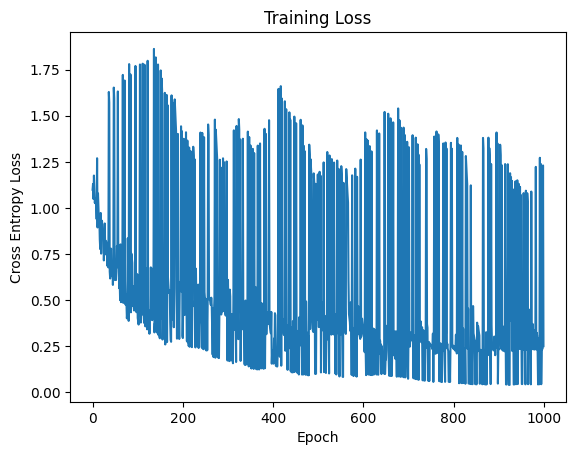

Weights Matrix:
 [[ 0.38134552  1.24469219]
 [ 2.18142763 -0.17200615]
 [ 0.43722685  1.92731396]]
Biases:
 [ 0.27997361  0.16740899 -0.4473826 ]


In [2]:
features = [
    [1, 2],
    [2, 1],
    [3, 1],
    [1, 3],
    [2, 3]
]
labels = [0, 1, 1, 2, 2]  # 3 clases: 0, 1, 2

weights_matrix, biases = softmax_regression_algorithm(features, labels, num_classes=3)
print("Weights Matrix:\n", weights_matrix)
print("Biases:\n", biases)